## 一维伪随机数

`fract` 这个函数可以获得小数部分

In [ ]:
import numpy as np 
def fract(x):
    return x - np.floor(x)

一维的伪随机数

一维的随机数实质就是一个「一元函数」：`y = rand(x)` 

> 注：这种随机是确定的，对于同一个输入值，每次调用返回的值相同

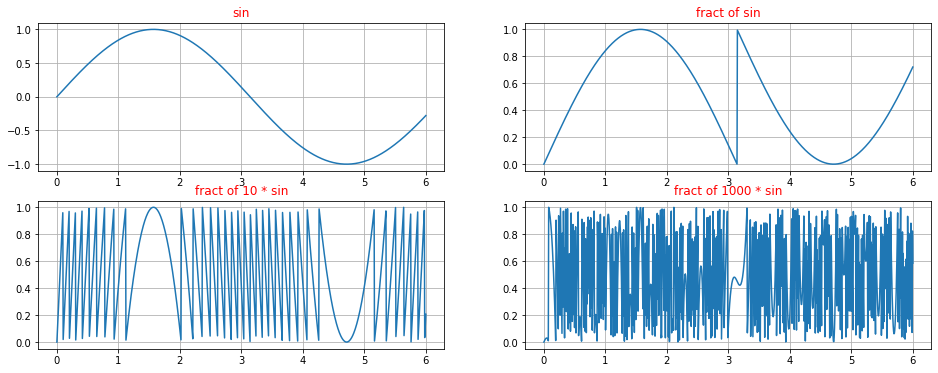

In [ ]:
import matplotlib.pylab as plt 
import numpy as np
x = np.linspace(0, 6, 1000)

def noise1d(x, k):
    return fract(np.sin(x) * k)

fig = plt.figure(figsize=(16, 6))

def plot(idx, a, b, title):
    axes = fig.add_subplot(2, 2, idx)
    axes.plot(a, b)
    axes.grid()
    axes.set_title(title, color="r")

# 原版的 sin 函数
plot(1, x, np.sin(x), "sin")

# 取小数部分
plot(2, x, fract(np.sin(x)), "fract of sin")

# fract(sin(x) * 10.0)
plot(3, x, noise1d(x, 10.0), "fract of 10 * sin")

# fract(sin(x) * 1000.0)
plot(4, x, noise1d(x, 1000.0), "fract of 1000 * sin")

利用上述随机数生成的基本原理，生成更多的随机数

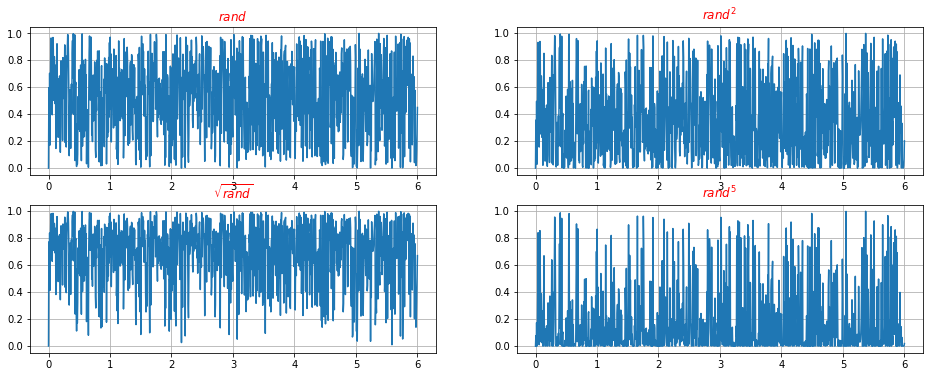

In [ ]:
def rand(x):
    return fract(np.sin(x) * 100000.0)

x = np.linspace(0, 6, 1000)

fig = plt.figure(figsize=(16, 6))

def plot(idx, a, b, title):
    axes = fig.add_subplot(2, 2, idx)
    axes.plot(a, b)
    axes.grid()
    axes.set_title(title, color="r")

# 原本的随机数
plot(1, x, rand(x), r"$ rand $")

# 第二种
plot(2, x, rand(x) * rand(x), r"$ rand^2 $")

# 第三种
plot(3, x, np.sqrt(rand(x)), r"$ \sqrt{rand} $")

# 第四种
plot(4, x, np.power(rand(x), 5.0), r"$ rand^5 $")

## 二维伪随机数

二维伪随机数是一个函数 `y = rand(x)`

- 其中 `x` 是二维向量，`y` 是一个一维的数。
- 这个函数本质就是一个「二元函数」

一种实现方法就是，将二维向量 `x` 映射到一个浮点数 `f`，然后利用前面的一位随机变量来得到函数值

如何将二维向量 `x` 映射为一维的浮点数？

可以用这个方法来实现：`vec2(12.9898, 78.233).dot(uv)`

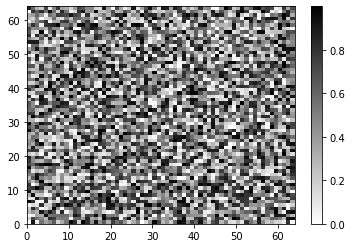

In [ ]:
# Author @patriciogv - 2015
# http://patriciogonzalezvivo.com

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def fract(x):
    return x - np.floor(x)

def rand(s, t):
    return fract(np.sin(12.9898 * s + 78.233 * t) * 43758.5453123)

# 生成 64 * 64 的位置坐标
x, y = np.meshgrid(np.arange(64), np.arange(64))

# 为每个位置计算一个随机值
data = rand(x, y)

# 为随机值映射颜色
cmap = LinearSegmentedColormap.from_list("bw", list(zip(
    [0.0, 1.0],
    ["white", "black"]
)))

fig, axes = plt.subplots()
psm = axes.pcolormesh(data, cmap=cmap)
fig.colorbar(psm, ax=axes)
